## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
from keras.layers import Dropout

# 加一層！
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape, name='input')
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i))(x)
            x = Dropout(drp_ratio)(x)
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
BATCH_SIZE = 256
EPOCHS = 50
LEARNING_RATE = 1e-3
MOMENTUM = 0.95
DROPOUT_EXP = 0.3

In [11]:
results = {}
# DROPOUT_EXP = 0.3
# 4 hidden layers
model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=DROPOUT_EXP)
model.summary()
opt = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_test, y_test), shuffle=True)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0   

Epoch 45/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.4780 - accuracy: 0.4714 - val_loss: 1.4069 - val_accuracy: 0.4970
Epoch 46/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.4676 - accuracy: 0.4752 - val_loss: 1.4144 - val_accuracy: 0.4953
Epoch 47/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.4657 - accuracy: 0.4763 - val_loss: 1.3979 - val_accuracy: 0.4980
Epoch 48/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.4571 - accuracy: 0.4784 - val_loss: 1.3895 - val_accuracy: 0.4987
Epoch 49/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.4549 - accuracy: 0.4836 - val_loss: 1.3883 - val_accuracy: 0.4993
Epoch 50/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.4501 - accuracy: 0.4819 - val_loss: 1.3874 - val_accuracy: 0.5015


In [13]:
train_loss = model.history.history["loss"]
val_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
val_acc = model.history.history["val_accuracy"]
results["drop-0.3-SGD"] = {
    "train-loss": train_loss, 
    "val-loss": val_loss,
    "train-acc": train_acc,
    "val-acc": val_acc
}

In [19]:
model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=0.2)
model.summary()
opt = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_test, y_test), shuffle=True)
train_loss = model.history.history["loss"]
val_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
val_acc = model.history.history["val_accuracy"]
results["drop-0.2-SGD"] = {
    "train-loss": train_loss, 
    "val-loss": val_loss,
    "train-acc": train_acc,
    "val-acc": val_acc
}

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0   

Epoch 45/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.3254 - accuracy: 0.5277 - val_loss: 1.3279 - val_accuracy: 0.5241
Epoch 46/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.3204 - accuracy: 0.5287 - val_loss: 1.3374 - val_accuracy: 0.5251
Epoch 47/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.3164 - accuracy: 0.5291 - val_loss: 1.3307 - val_accuracy: 0.5265
Epoch 48/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.3081 - accuracy: 0.5308 - val_loss: 1.3351 - val_accuracy: 0.5258
Epoch 49/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.3028 - accuracy: 0.5377 - val_loss: 1.3165 - val_accuracy: 0.5318
Epoch 50/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.2909 - accuracy: 0.5387 - val_loss: 1.3295 - val_accuracy: 0.5291


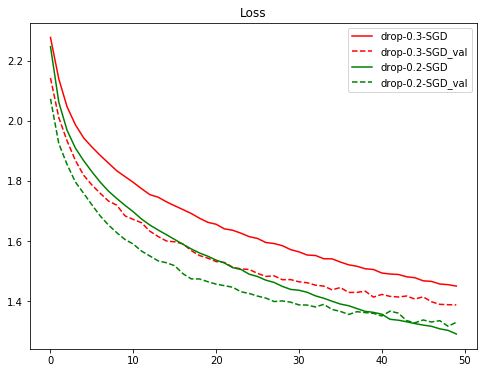

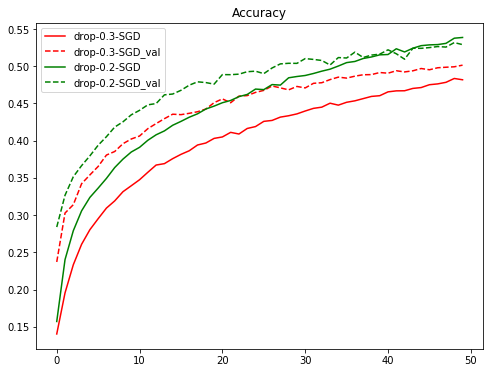

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b"]
plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train-loss"])), results[cond]["train-loss"], '-', c=color_bar[i], label=cond)
    plt.plot(range(len(results[cond]["val-loss"])), results[cond]["val-loss"], '--', c=color_bar[i], label=cond+'_val')
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train-acc"])), results[cond]["train-acc"], '-', c=color_bar[i], label=cond)
    plt.plot(range(len(results[cond]["val-acc"])), results[cond]["val-acc"], '--', c=color_bar[i], label=cond+'_val')
plt.title('Accuracy')
plt.legend()
plt.show()

In [28]:
model = build_mlp(x_train.shape[1:], drp_ratio=0.2)
model.summary()
opt = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_test, y_test), shuffle=True)
train_loss = model.history.history["loss"]
val_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
val_acc = model.history.history["val_accuracy"]
results["drop-0.2-Adam"] = {
    "train-loss": train_loss, 
    "val-loss": val_loss,
    "train-acc": train_acc,
    "val-acc": val_acc
}

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_23 (Dropout)         (None, 128)               0   

Epoch 45/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.4621 - accuracy: 0.4729 - val_loss: 1.4440 - val_accuracy: 0.4824
Epoch 46/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.4689 - accuracy: 0.4739 - val_loss: 1.4391 - val_accuracy: 0.4861
Epoch 47/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.4628 - accuracy: 0.4747 - val_loss: 1.4356 - val_accuracy: 0.4881
Epoch 48/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.4602 - accuracy: 0.4742 - val_loss: 1.4237 - val_accuracy: 0.4897
Epoch 49/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.4584 - accuracy: 0.4783 - val_loss: 1.4272 - val_accuracy: 0.4939
Epoch 50/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.4553 - accuracy: 0.4804 - val_loss: 1.4381 - val_accuracy: 0.4898


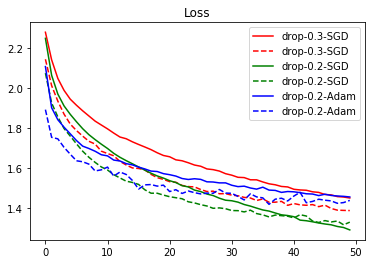

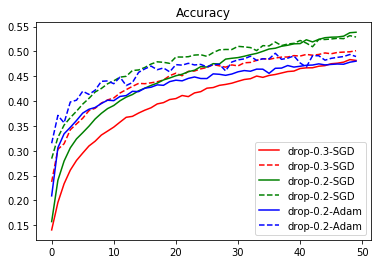

In [29]:
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train-loss"])), results[cond]["train-loss"], '-', c=color_bar[i], label=cond)
    plt.plot(range(len(results[cond]["val-loss"])), results[cond]["val-loss"], '--', c=color_bar[i], label=cond)
plt.title('Loss')
plt.legend()
plt.show()

for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train-acc"])), results[cond]["train-acc"], '-', c=color_bar[i], label=cond)
    plt.plot(range(len(results[cond]["val-acc"])), results[cond]["val-acc"], '--', c=color_bar[i], label=cond)
plt.legend()
plt.title('Accuracy')
plt.show()